# Plots in "Exploring the ability of the MD+FoldX method to predict SARS-CoV-2 antibody escape mutations using large-scale data"

Paper authors: L.America Chi, Jonathan E. Barnes, Jagdish Suresh Patel and F. Marty Ytreberg

Notebook author: L. América Chi

In [1]:
# Libraries
import pandas as pd                # data manipulation
import numpy as np                 # vectors,matrix,functions
import matplotlib.pyplot as plt    # 2D figures
import seaborn as sns              # fancy plots and statistics
import scipy.stats as stats        # Complex statistics
from scipy.optimize import curve_fit # optimization techniques
import math                        # mathematical functions and constants
from scipy.stats import pearsonr   # correlations
from scipy.stats import spearmanr  # correlations
from tabulate import tabulate      # To make tables on the fly
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MultipleLocator # 

In [2]:
# Default parameters for text in plots, LaTeX style 
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

## Figure 3

### Pearson and Spearman correlation coefficients between predicted ∆Gbind values and experimental escape fractions (f), represented by F(f) as defined in Equation (2). We show all the Ab/Ag complexes spanning the 4 Ab classes.

In [3]:
# Data
data_r = {
    'Class 1': {'AZD8895': 0.64, 'S2E12': 0.62, 'REGN10933': 0.35, 'C105': 0.33, 'S2H14': 0.37},
    'Class 2': {'S2D106': 0.53, 'C121up': 0.37, 'C121down': 0.56, 'C002': 0.47, 'C144': 0.59, 'LY-CoV555': 0.68, 'S2H13': 0.4},
    'Class 3': {'CoV2-2130': 0.58, 'C110': 0.45, 'LY-CoV1404': 0.55, 'C135': 0.4, 'REGN10987': 0.4},
    'Class 4': {'S2H97': 0.52, 'S2X259': 0.66, 'S2X35': 0.65}
}

data_s = {
    'Class 1': {'AZD8895': 0.2, 'S2E12': 0.37, 'REGN10933': 0.19, 'C105': 0.21, 'S2H14': 0.4},
    'Class 2': {'S2D106': 0.28, 'C121up': 0.33, 'C121down': 0.27, 'C002': 0.31, 'C144': 0.25, 'LY-CoV555': 0.41, 'S2H13': 0.06},
    'Class 3': {'CoV2-2130': 0.29, 'C110': 0.33, 'LY-CoV1404': 0.09, 'C135': 0.19, 'REGN10987': 0.12},
    'Class 4': {'S2H97': 0.15, 'S2X259': 0.12, 'S2X35': 0.24}
}

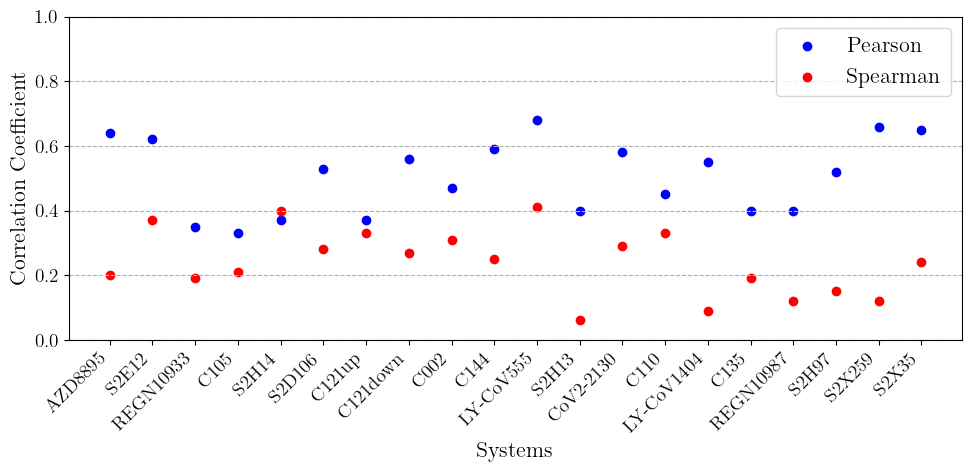

In [4]:
# Extract system names and correlation values
system_names = []
pearson_values = []
spearman_values = []

for p in data_r.values():
    system_names.extend(p.keys())
    pearson_values.extend(p.values())

for s in data_s.values():
    spearman_values.extend(s.values())

# Plot scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(system_names, pearson_values, color='blue', label = 'Pearson')
plt.scatter(system_names, spearman_values, color='red', label = 'Spearman')

# Rotate xy-labels 
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize = 14)

# Set y-axis limit
plt.ylim(0, 1)

# Grid
plt.yticks(np.arange(0, 1.1, 0.2))
plt.grid(axis='y', linestyle='--')

plt.xlabel('Systems', weight='bold')
plt.ylabel('Correlation Coefficient', weight='bold')
plt.legend()

plt.tight_layout()
#plt.savefig("correlations_r.svg", transparent=True)
#plt.show()

## Figure 4

### Example of a cutoff optimization using the S2H14 class 1 system. a) Precision, recall, and F-Score values across a range of cutoffs. b) Scatter of predicted ∆Gbind values against F(f); the green dashed line represents the optimized cutoff, the orange dashed line indicates the classic cutoff, the grey dashed line represents the escape fraction value at which the 50% of the cells expressing a specific variant escape Ab binding, and the solid grey line indicates the value of the ∆Gbind for the wild-type Ag.

In [5]:
# data
dfOptimizationS2H14 = pd.read_csv('../data/S2H14CutoffOptim.csv', index_col=0) 
dfDGS2H14 = pd.read_csv('../data/DGdfInter_hill_S2H14.csv', index_col=0)
palette = sns.color_palette('deep')
S2H14wt = -14.78
bestTS2H14 = -14

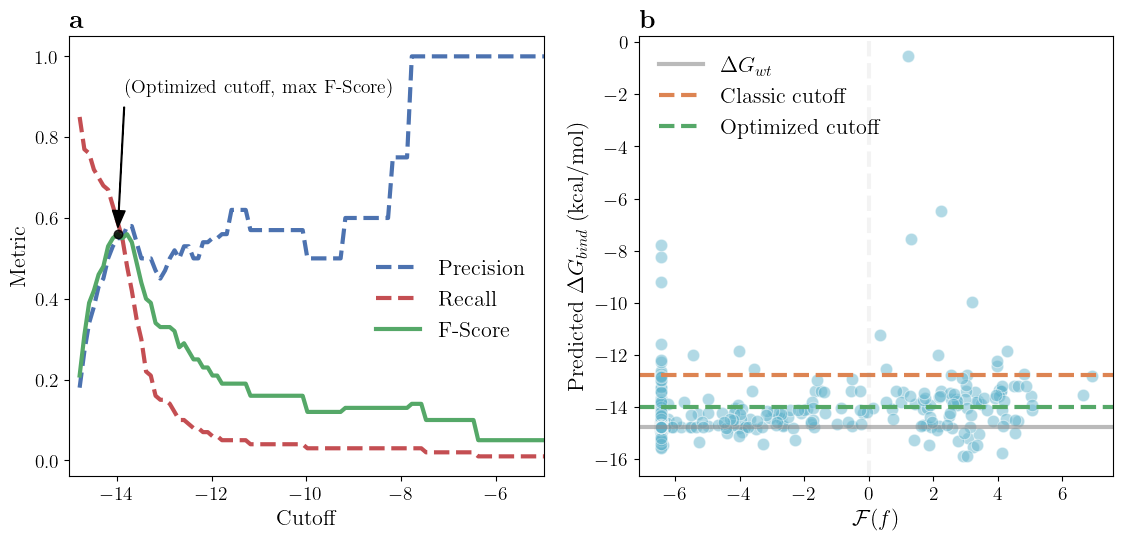

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5.5), facecolor='white')

x = dfOptimizationS2H14['threshold']
y1 = dfOptimizationS2H14['precision']
y2 = dfOptimizationS2H14['recall']
y3 = dfOptimizationS2H14['FScore']

# Create a Seaborn line plot
sns.lineplot(x=x, y=y1, color=palette[0], lw=3, label='Precision', ax=ax[0])
sns.lineplot(x=x, y=y2, color=palette[3], lw=3, label='Recall', ax=ax[0])
sns.lineplot(x=x, y=y3, color=palette[2], lw=3, label='F-Score', ax=ax[0])

# Find the index of the maximum value in the y3 array
max_index = np.argmax(y3)

# Max F-Score point and annotation
max_index = np.argmax(y3)

# Plot a red dot at the maximum point
ax[0].scatter(x=x[max_index], y=y3[max_index], color='k', zorder=2, marker='.', s=150, alpha=0.8)
ax[0].annotate('(Optimized cutoff, max F-Score)', xy=(x[max_index], y3[max_index]), xytext=(x[max_index]+3, y3[max_index]+0.35),
            arrowprops=dict(facecolor='black',shrink=0.05, width=0.5, headwidth=9), fontsize=14, horizontalalignment='center')

ax[0].set_xlim((-15,-5))
# Add labels and a title
ax[0].set_xlabel('Cutoff')
ax[0].set_ylabel('Metric')
ax[0].set_title(r'\textbf{a}', loc='left')
for i in range(2):
    ax[0].lines[i].set_linestyle("--")
ax[0].legend(loc='center right', bbox_to_anchor=(1, 0.4), frameon=False)
#ax[0].legend(loc='upper left', frameon=False)

    
sns.scatterplot(data=dfDGS2H14, x="escape_frac",y = "mean", ax=ax[1], s=80, alpha =0.5, color=palette[9])
ax[1].axhline(y=S2H14wt, color=palette[7], linestyle='-', label = '$\Delta G_{wt}$', lw=3, alpha =0.6)
ax[1].axhline(y=S2H14wt+2, color=palette[1], lw=3, linestyle='--',label = 'Classic cutoff')
ax[1].axhline(y=bestTS2H14, color=palette[2], lw=3, linestyle='--', label='Optimized cutoff')

ax[1].axvline(x=0, color=palette[7], linestyle='--', lw=3, alpha =.1)
ax[1].set_xlabel('$\mathcal{F}(f)$')
ax[1].set_ylabel('Predicted $\Delta G_{bind}$ (kcal/mol)')
ax[1].set_title(r'\textbf{b}', loc='left')

# Reduce the margins
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.08, right=0.95, hspace=0.2)

# Show the legend
plt.legend(frameon=False)

#plt.savefig('Fscore_opt_DG.pdf')

## Figure 5

### Optimized ∆∆G cutoffs for each system. The red dashed line represents the classic cutoff.

In [7]:
#data
data = {
    'Class 1': {'AZD8895': 2.2, 'S2E12': 1.7, 'REGN10933': 2.6, 'C105': 0.4, 'S2H14': 0.8},
    'Class 2': {'S2D106': 3.0, 'C121up': 2.6, 'C121down': 2.8, 'C002': 1.0, 'C144': 1.8, 'LY-COV555': 2.7, 'S2H13': 1.2},
    'Class 3': {'COV2-2130': 1.2, 'C110': 0.4, 'COV-1404': 1.6, 'C135': 0.2, 'REGN10987': 0.8},
    'Class 4': {'S2H97': 2.1, 'S2X259': 2.9, 'S2X35': 4.0}
}

Text(0, 0.5, 'Optimized cutoff (kcal/mol)')

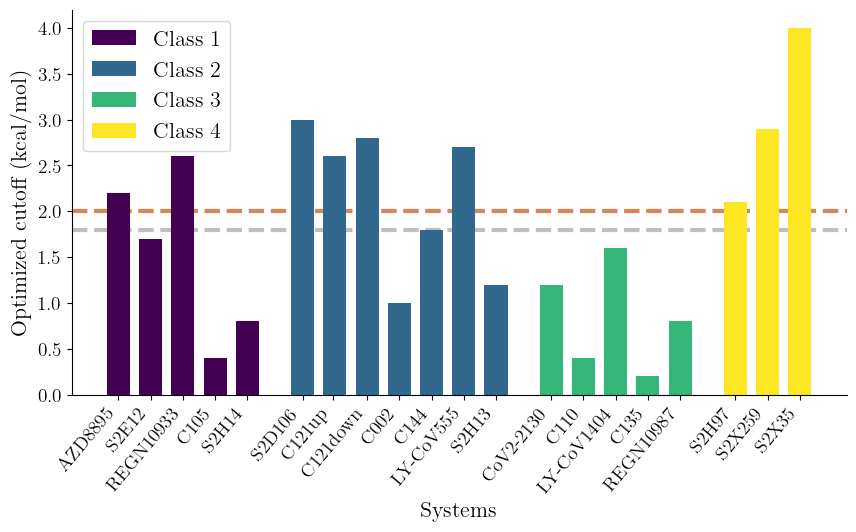

In [8]:
# Convert data to a DataFrame
df = pd.DataFrame(data)

# Plot grouped bar histograms
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 1  # Adjust the width as needed
bar_positions = range(len(df.index))
class_offset = 0.4  # Additional offset for x-space between classes

# Choose a colormap for coloring each subgroup
colors = plt.cm.viridis(np.linspace(0, 1, len(df.columns)))
Xticks = []
handles = []  # To store legend handles

for i, (class_name, values) in enumerate(df.iterrows()):
    x_positions = [pos + i * (bar_width + class_offset) for pos in bar_positions]
    Xticks.append(x_positions[3])

    for j, (x, value) in enumerate(zip(x_positions, values)):
        bar = ax.bar(x, value, bar_width, color=colors[j], label=f'{class_name} - {df.columns[j]}')
        if i == 0:  # Store only the first set of bars for the legend
            handles.append(bar)

# Adding the horizontal line
ax.axhline(y=2, color=palette[1], linestyle='--', linewidth=3, zorder=0, label='Classical cutoff')
ax.axhline(y=1.8, color='grey', linestyle='--', linewidth=3, zorder=0, alpha=0.5, label='Median optimized cutoff')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-tick positions and labels
ax.set_xticks([0.0, 1.4, 2.8, 4.2, 5.6, 8.0, 9.3, 10.8, 12.2, 13.6, 15.0, 16.4, 18.8, 20.2, 21.6, 23.0, 24.4, 26.8, 28.2, 29.6],['AZD8895','S2E12', 'REGN10933', 'C105', 'S2H14', 'S2D106', 'C121up', 'C121down', 'C002', 'C144', 'LY-COV555', 'S2H13', 'COV2-2130', 'C110', 'COV-1404','C135', 'REGN10987', 'S2H97','S2X259', 'S2X35'], rotation = 50,  ha='right')
ax.set_xticklabels(['AZD8895','S2E12', 'REGN10933', 'C105', 'S2H14', 'S2D106', 'C121up', 'C121down', 'C002', 'C144', 'LY-CoV555', 'S2H13', 'CoV2-2130', 'C110', 'LY-CoV1404','C135', 'REGN10987', 'S2H97','S2X259', 'S2X35'], rotation=50, ha='right')

# Adding legend
#ax.legend(handles=handles + [plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2)], labels=df.columns.tolist() + ['Classical cutoff'])
ax.legend(handles=handles, labels=df.columns.tolist())

plt.xlabel('Systems')
plt.ylabel('Optimized cutoff (kcal/mol)')
#plt.show()
#plt.savefig("optimized_cutoff.svg", transparent = True)

## Figure 6

### Performance comparison across systems as defined by Equation(3) using optimized cutoffs for each system.

In [9]:
# data
performance_optimizado = {
    'Class 1': {'AZD8895': 77, 'S2E12': 83, 'REGN10933': 48, 'C105': 41, 'S2H14': 55},
    'Class 2': {'S2D106': 100, 'C121up': 45, 'C121down': 63, 'C002': 52, 'C144': 90, 'LY-COV555': 88, 'S2H13': 94},
    'Class 3': {'COV2-2130': 61, 'C110': 42, 'COV-1404': 68, 'C135': 25, 'REGN10987': 88},
    'Class 4': {'S2H97': 36, 'S2X259': 58, 'S2X35': 100},
}

# Adding a second set of bars
performance_clasico = {
    'Class 1': {'AZD8895': 69, 'S2E12': 79, 'REGN10933': 42, 'C105': 33, 'S2H14': 52},
    'Class 2': {'S2D106': 42, 'C121up': 27, 'C121down': 44, 'C002': 33, 'C144': 100, 'LY-COV555': 78, 'S2H13': 100},
    'Class 3': {'COV2-2130': 60, 'C110': 100, 'COV-1404': 65, 'C135': 0, 'REGN10987': 100},
    'Class 4': {'S2H97': 35, 'S2X259': 42, 'S2X35': 78},
}

Text(0, 0.5, 'Performance ($\\%$)')

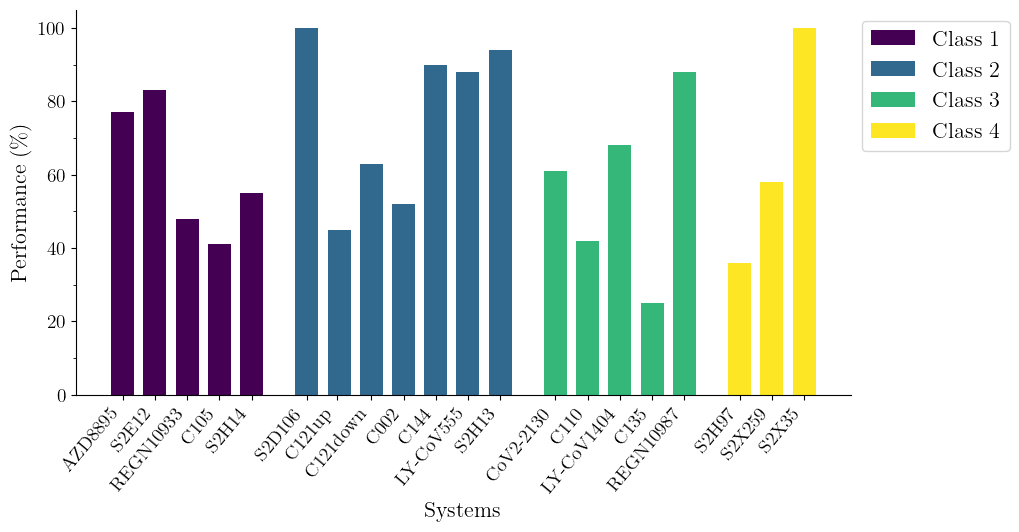

In [10]:
# Convert data to DataFrames
df = pd.DataFrame(performance_optimizado)
df_second_set = pd.DataFrame(performance_clasico)

# Plot grouped bar histograms
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 1  # Adjust the width as needed
bar_positions = np.arange(len(df.index))
class_offset = 0.4  # Additional offset for x-space between classes

# Choose a colormap for coloring each subgroup
colors = plt.cm.viridis(np.linspace(0, 1, len(df.columns)))
Xticks = []
handles = []  # To store legend handles

for i, (class_name, values) in enumerate(df.iterrows()):
    x_positions = [pos + i * (bar_width + class_offset) for pos in bar_positions]
    Xticks.append(x_positions[len(df.columns)//2])

    for j, (x, value) in enumerate(zip(x_positions, values)):
        bar = ax.bar(x, value, bar_width, color=colors[j], label=f'{class_name} - {df.columns[j]}')
        if i == 0:  # Store only the first set of bars for the legend
            handles.append(bar)


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-tick positions and labels
ax.set_xticks([0.0, 1.4, 2.8, 4.2, 5.6, 8.0, 9.3, 10.8, 12.2, 13.6, 15.0, 16.4, 18.8, 20.2, 21.6, 23.0, 24.4, 26.8, 28.2, 29.6],['AZD8895','S2E12', 'REGN10933', 'C105', 'S2H14', 'S2D106', 'C121up', 'C121down', 'C002', 'C144', 'LY-COV555', 'S2H13', 'COV2-2130', 'C110', 'COV-1404','C135', 'REGN10987', 'S2H97','S2X259', 'S2X35'], rotation = 50,  ha='right')
ax.set_xticklabels(['AZD8895','S2E12', 'REGN10933', 'C105', 'S2H14', 'S2D106', 'C121up', 'C121down', 'C002', 'C144', 'LY-CoV555', 'S2H13', 'CoV2-2130', 'C110', 'LY-CoV1404','C135', 'REGN10987', 'S2H97','S2X259', 'S2X35'], rotation=50, ha='right')

# Set y-axis ticks every 20 units
major_locator = MultipleLocator(20)
ax.yaxis.set_major_locator(major_locator)

# Add internal y-axis ticks every 10 units without labels
minor_locator = MultipleLocator(10)
ax.yaxis.set_minor_locator(minor_locator)
ax.tick_params(axis='y', which='minor', size=2)  # Hide the minor ticks

# Adding legend
ax.legend(handles=handles, labels=df.columns.tolist(), loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Systems')
plt.ylabel('Performance ($\%$)')
#plt.show()
#plt.savefig("performance_comparision.pdf")

## Figure 7

### Heat map of predicted ∆∆Gbind values using MD+FoldX for mutations in the RBD when in complex with LY-CoV555 Class 2 Ab. The horizontal axis displays the amino acid positions in the RBD along with the corresponding native amino acids. The vertical axis represents the mutation of amino acids colored according to physicochemical proper- ties: small non-polar, hydrophobic, polar, negatively charged and positively charged. White squares represent the amino acids of the wild-type. For clarity in visualization, sites where all mutations led to changes in binding free energy of less than 0.5 kcal/mol were omitted from the heat map.

In [11]:
# data
systems = ['LY-CoV555']  
dfDDG_cov555_raw = pd.read_csv('../data/cov555_total.txt', index_col=0).iloc[0:]
df_cov555 = pd.DataFrame(dfDDG_cov555_raw.mean(axis=0), columns=['mean'])
df_cov555['std'] = dfDDG_cov555_raw.std(axis=0).values
df_cov555["Site"] = df_cov555.index.str[2:-1]
df_cov555["Mutation"] = df_cov555.index.str[-1]
df_cov555["WT"] = df_cov555.index.str[0]
df_cov555['System'] = 'cov555'
#df_cov555.index.str[2:-1].astype(int)

In [12]:
system = 'cov555'

amino_acid_colors = {
    'G': 'Orange', 'A': 'Orange', 'S': 'Orange', 'T': 'Orange',  # Small nonpolar
    'C': 'Green', 'V': 'Green', 'I': 'Green', 'L': 'Green', 'P': 'Green', 
    'F': 'Green', 'Y': 'Green', 'M': 'Green', 'W': 'Green',      # Hydrophobic
    'N': 'Magenta', 'Q': 'Magenta', 'H': 'Magenta',              # Polar
    'D': 'Red', 'E': 'Red',                                       # Negatively charged
    'K': 'Blue', 'R': 'Blue'                                      # Positively charged
}

# Create a pivot table (matrix)
pivot_df = df_cov555.pivot_table(values="mean", index="Mutation", columns="Site")

# Invert the order of the sorted index
pivot_df = pivot_df[::-1]

# Modify the x-axis labels to include the letter corresponding to "WT" for each specific site
new_columns = []
for col in pivot_df.columns:
    site_number = col
    wt_letter = df_cov555[df_cov555["Site"] == site_number]["WT"][0]
    new_columns.append(f"{wt_letter}{col}")

# Rename the columns in the pivot_df
pivot_df.columns = new_columns

# Delete columns according the threshold
threshold = 0.5
# This mask save the columns where all elements are less or equal threshold above
mask = (pivot_df <= threshold).sum(axis=0) >= 19 # 19 is for the number of aminoacids (rows -1)
pivot_df = pivot_df.drop(columns=pivot_df.columns[mask])

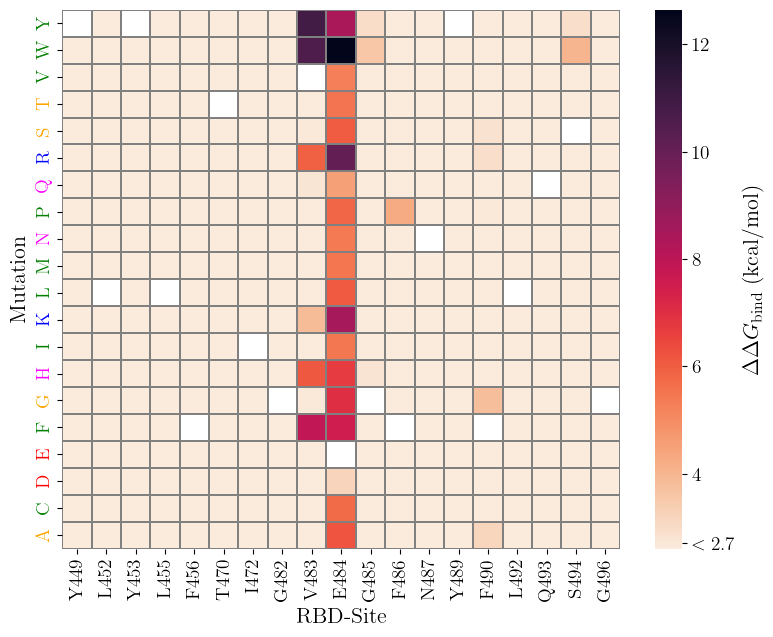

In [13]:
fig, ax = plt.subplots(figsize=(9, 7))

# Create a list of colors for the Y-axis labels
y_label_colors = [amino_acid_colors.get(aa[0], 'black') for aa in pivot_df.index]

sns.heatmap(pivot_df, cmap="rocket_r", linewidths=0.1, linecolor="grey",
            cbar_kws={"label": r" $\Delta\Delta G_{\mathrm{bind}}$ (kcal/mol)"}, vmin=2.6, ax = ax)

# Color the ytick labels
for ytick, color in zip(ax.get_yticklabels(), y_label_colors):
    ytick.set_color(color)
    
cbar = ax.collections[0].colorbar
cbar.set_ticks([2.7, 4, 6, 8, 10, 12])  # Define the positions for the ticks
cbar.set_ticklabels(['$<2.7$', 4, 6, 8, 10, 12])
    
# plt.title(f"{system}")
plt.xlabel("RBD-Site")
plt.ylabel("Mutation")
#plt.savefig('heatmap_cov555_reduced.svg', transparent = True)
plt.show()